### Multiclass Classification

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [6]:
# Show the first training example
print(f"Training sample:\n{train_data[1]}\n")
print(f"Training label: {train_labels[1]}")

Training sample:
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  

In [3]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Image dimensions - 28x28 total samples 60000 for training and 10000 test set

In [4]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

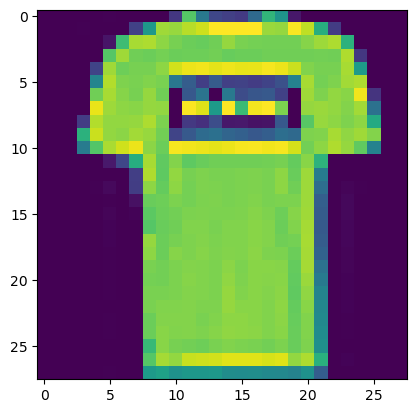

In [7]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[1]);

Labels are in numberical form. Fine for neural network but we want to have them in human readable form.



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

In [10]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer(we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax") # output shape is 10, activation is softmax and not sigmoid
])
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classification
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history=non_norm_history=model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3904 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 2s 972us/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 2s 991us/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 2s 988us/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 2s 980us/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 7/10
1875/1875 [==============================] - 2s 967us/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3028 - val

In [ ]:
import pandas as pd

<Axes: xlabel='Epochs'>

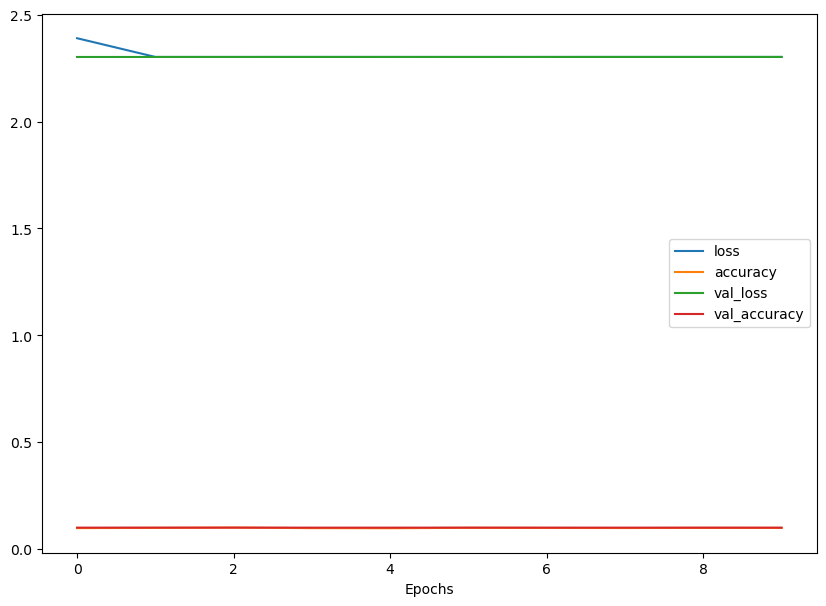

In [11]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="Epochs")

In [12]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [6]:
torch.cuda.is_available()

False

In [5]:
!nvidia-smi

Sun Aug 10 12:52:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.40                 Driver Version: 576.40         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8             10W /  135W |     168MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# # Get GPU available memory
# import torch
# gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
# gpu_memory_gb = round(gpu_memory_bytes / (2**30))
# print(f"Available GPU memory: {gpu_memory_gb} GB")

In [13]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer(we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax") # output shape is 10, activation is softmax and not sigmoid
])
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classification
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history=non_norm_history=model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3016 - accuracy: 0.4993 - val_loss: 0.9213 - val_accuracy: 0.6646
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7784 - accuracy: 0.7157 - val_loss: 0.7482 - val_accuracy: 0.7161
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6855 - accuracy: 0.7441 - val_loss: 0.7042 - val_accuracy: 0.7471
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6525 - accuracy: 0.7603 - val_loss: 0.6732 - val_accuracy: 0.7612
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6323 - accuracy: 0.7740 - val_loss: 0.6645 - val_accuracy: 0.7679
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6180 - accuracy: 0.7842 - val_loss: 0.6599 - val_accuracy: 0.7740
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6089 - accuracy: 0.7884 - val_loss: 0.6461 - val_accuracy:

<Axes: xlabel='Epochs'>

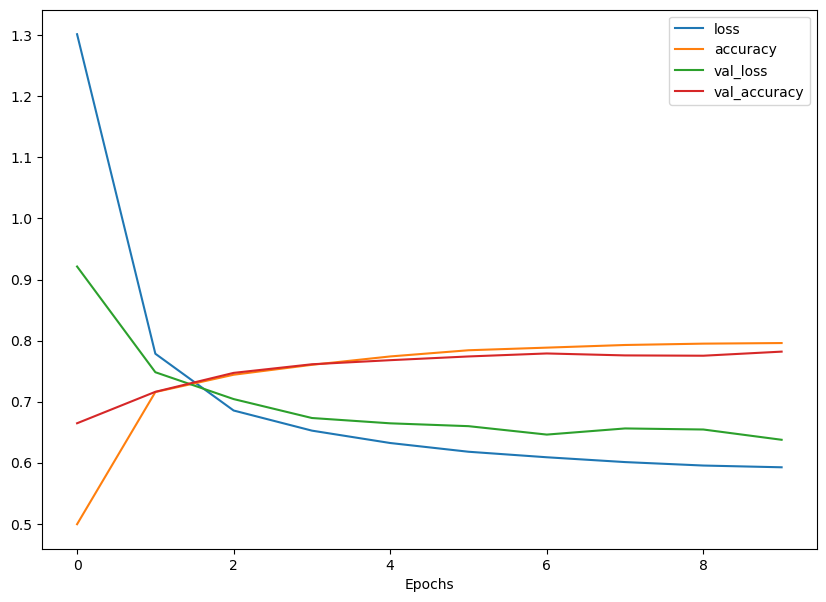

In [14]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="Epochs")

In [ ]:
## We will find the optimal learning rate value and the appropriate number of epochs


In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2743 - accuracy: 0.5165 - val_loss: 0.9177 - val_accuracy: 0.6676 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7570 - accuracy: 0.7321 - val_loss: 0.6990 - val_accuracy: 0.7561 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 983us/step - loss: 0.6494 - accuracy: 0.7712 - val_loss: 0.6541 - val_accuracy: 0.7710 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 993us/step - loss: 0.6105 - accuracy: 0.7875 - val_loss: 0.6062 - val_accuracy: 0.7949 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 999us/step - loss: 0.5790 - accuracy: 0.7969 - val_loss: 0.5952 - val_accuracy: 0.7947 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5627 - accuracy: 0.8011 - val_loss: 0.5917 - val_accuracy: 0.7994 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

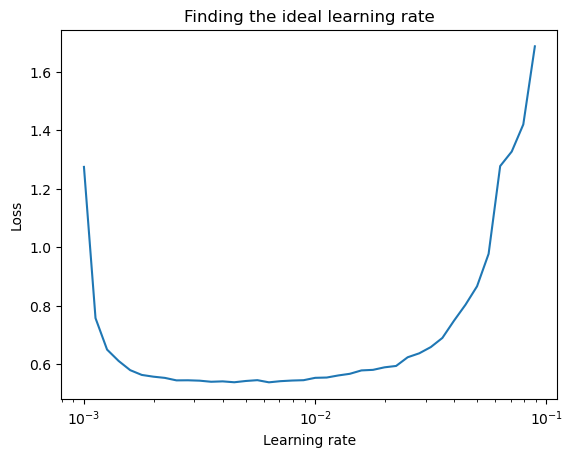

In [16]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2392 - accuracy: 0.5824 - val_loss: 0.7860 - val_accuracy: 0.7507
Epoch 2/20
1875/1875 [==============================] - 2s 983us/step - loss: 0.7058 - accuracy: 0.7701 - val_loss: 0.6762 - val_accuracy: 0.7775
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6391 - accuracy: 0.7867 - val_loss: 0.6390 - val_accuracy: 0.7849
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6082 - accuracy: 0.7966 - val_loss: 0.6160 - val_accuracy: 0.7946
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5909 - accuracy: 0.8012 - val_loss: 0.6162 - val_accuracy: 0.7852
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5774 - accuracy: 0.8075 - val_loss: 0.6214 - val_accuracy: 0.7889
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5697 - accuracy: 0.8074 - val_loss: 0.6074 - val_accurac

In [19]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [21]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 687us/step


array([[2.41879548e-06, 5.86950952e-13, 1.46855895e-11, 3.08997661e-10,
        8.84523899e-10, 2.35547591e-02, 4.83084341e-06, 5.73885292e-02,
        7.34511316e-02, 8.45598340e-01],
       [2.05147080e-04, 1.66745402e-13, 9.50442791e-01, 6.08793414e-07,
        1.43535845e-02, 0.00000000e+00, 3.49979103e-02, 9.91524665e-32,
        8.01489541e-09, 1.23348013e-28],
       [1.50417191e-05, 9.89686191e-01, 2.49463046e-04, 9.78377415e-04,
        8.78758822e-03, 2.22393677e-08, 1.86799283e-04, 7.35080539e-06,
        8.92311218e-05, 5.40040546e-09],
       [4.90453713e-05, 9.88568306e-01, 2.61751848e-04, 5.78300934e-03,
        4.61454969e-03, 3.30049988e-05, 2.49252567e-04, 2.60067842e-04,
        1.80747564e-04, 3.20100781e-07],
       [3.99441481e-01, 4.28855129e-09, 9.67466459e-02, 4.62319292e-02,
        2.22465070e-03, 9.45685773e-15, 4.53794986e-01, 1.50707550e-12,
        1.56040234e-03, 3.78559822e-10]], dtype=float32)

In [23]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

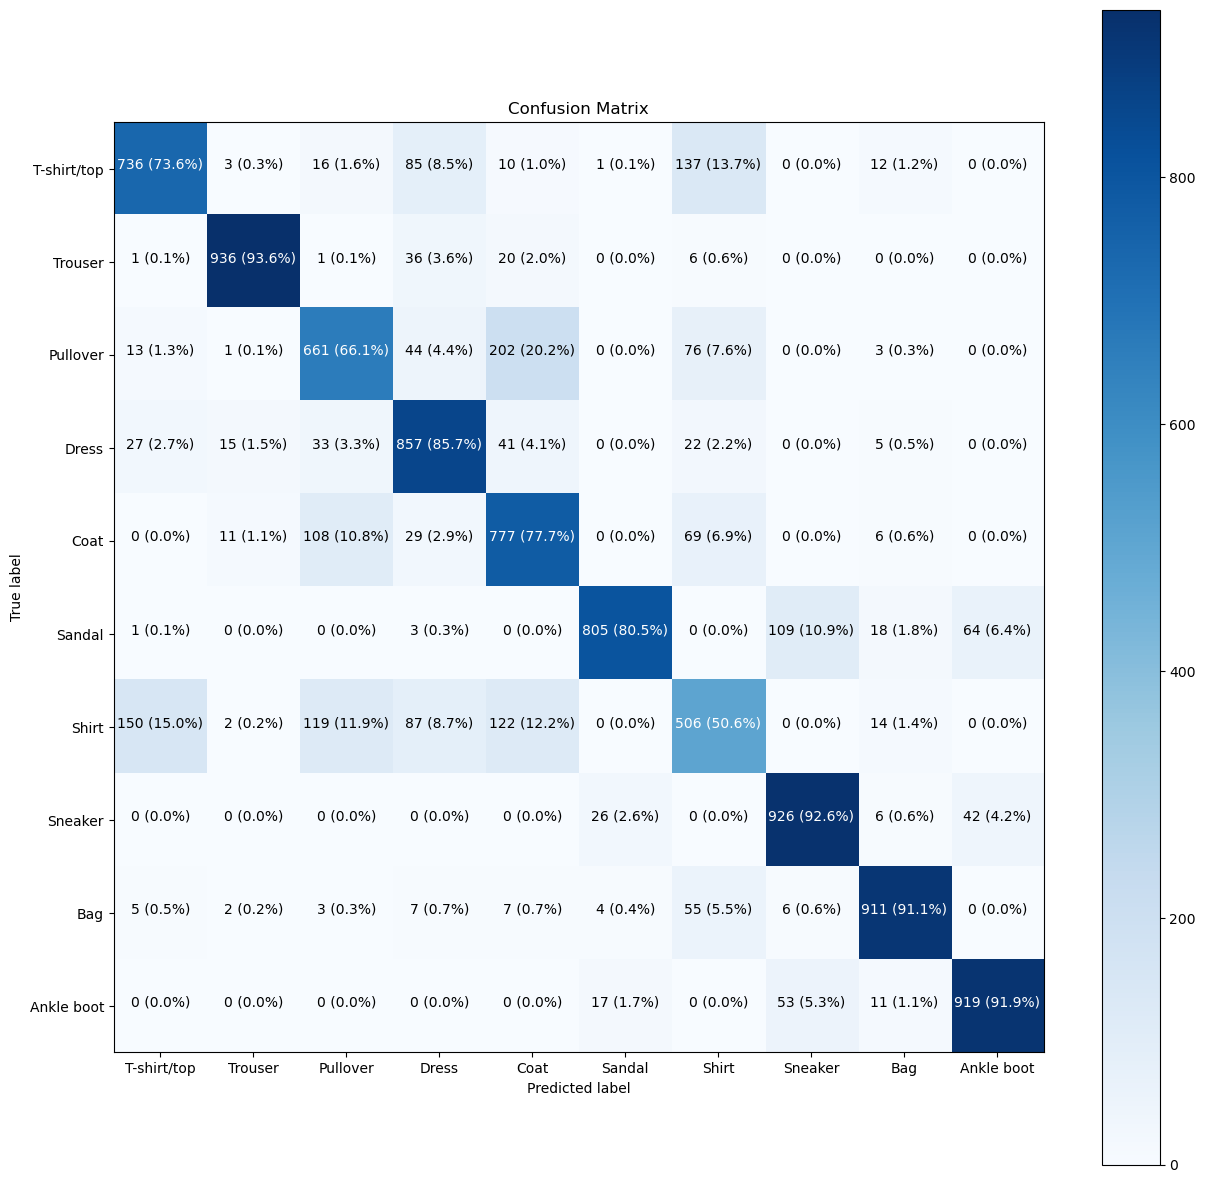

In [26]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)